In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/TSF-Internship/spam.csv',encoding='latin')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df = dataset.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.sample(5)

,v1,v2
2876,ham,twenty past five he said will this train have ...
4153,ham,Haf u eaten? Wat time u wan me 2 come?
790,ham,This is hoping you enjoyed your game yesterday...
310,ham,Today is ACCEPT DAY..U Accept me as? Brother S...
316,ham,Hmmm... Guess we can go 4 kb n power yoga... H...


In [ ]:
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
#MAPPING THE LABELS
df.rename({'v2':"message",'v1':'Type'},axis=1,inplace=True)
df.sample(5)

,Type,message
3678,ham,Stupid.its not possible
4243,ham,"Aight, I'm chillin in a friend's room so text ..."
5213,ham,3 pa but not selected.
1859,ham,What's up. Do you want me to come online?
5194,ham,Ok... Take ur time n enjoy ur dinner...


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.nunique()

Type          2
message    5169
dtype: int64

In [ ]:
df.describe()

,Type,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.groupby('Type').describe()

message                                                               
       count unique                                                top freq
Type                                                                       
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Type']=le.fit_transform(df['Type'])
print(df)

      Type                                            message
0        0  Go until jurong point, crazy.. Available only ...
1        0                      Ok lar... Joking wif u oni...
2        1  Free entry in 2 a wkly comp to win FA Cup fina...
3        0  U dun say so early hor... U c already then say...
4        0  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567     1  This is the 2nd time we have tried 2 contact u...
5568     0              Will Ì_ b going to esplanade fr home?
5569     0  Pity, * was in mood for that. So...any other s...
5570     0  The guy did some bitching but I acted like i'd...
5571     0                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
df['Type'].value_counts()

0    4825
1     747
Name: Type, dtype: int64

In [ ]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Type
Type,1.0


In [ ]:
df.dtypes

Type        int64
message    object
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,5572.0,0.134063,0.340751,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.isna().sum()

Type       0
message    0
dtype: int64

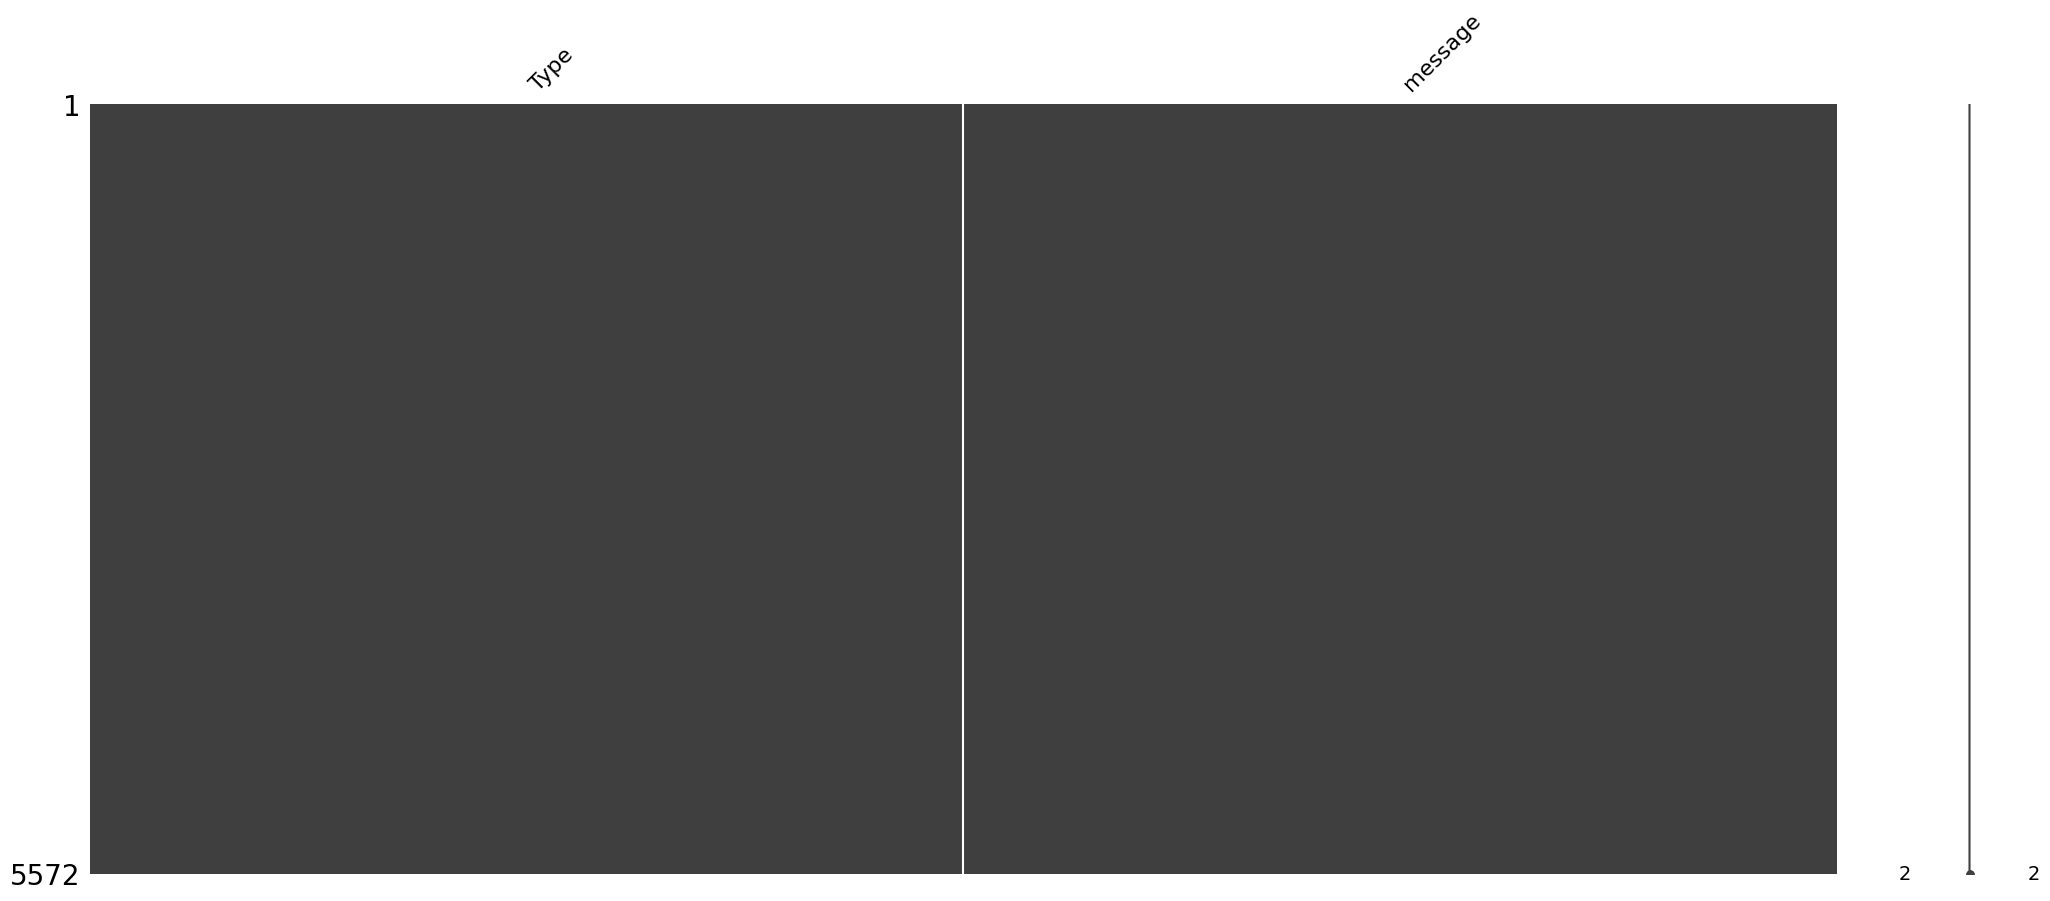

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

In [ ]:
#checking for duplicate rows
df.duplicated().sum()

403

In [ ]:
#droping duplicates if any
df.drop_duplicates()

,Type,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
print("Size of Dataset: {} rows , {} columns".format(df.shape[0],df.shape[1]))

Size of Dataset: 5572 rows , 2 columns


In [ ]:
df.nunique()

Type          2
message    5169
dtype: int64

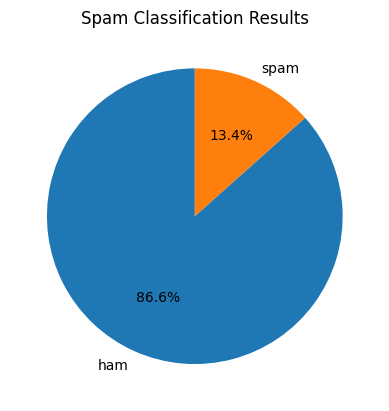

In [ ]:
# Create pie chart
plt.pie(df['Type'].value_counts(), labels=['ham','spam'], autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Spam Classification Results')

# Display the chart
plt.show()


In [ ]:
#CountVectorizer is used for converting a collection of text documents into a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [ ]:
x = df['message']
y = df['Type']

<Axes: >

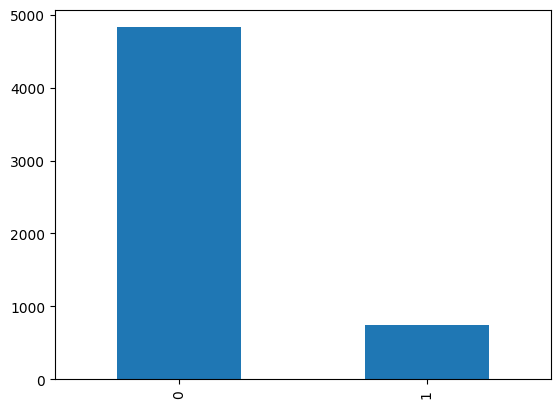

In [ ]:
y.value_counts().plot(kind = 'bar')

In [ ]:
print(x.shape,y.shape)

(5572,) (5572,)


In [ ]:
x=cv.fit_transform(x)

In [ ]:
x

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=0, shuffle=True, stratify=y)

In [ ]:
x_train.shape


(3900, 8672)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9814593301435407

In [ ]:
message='Congratulations! You have won a prize.'
data=[message]
a=cv.transform(data).toarray()
result=model.predict(a)
print(result)

[1]


In [ ]:
message="free ringtones"
data=[message]
a=cv.transform(data).toarray()
result=model.predict(a)
print(result)

[1]


In [ ]:
message="Cheers to you for a job well done!"
data=[message]
a=cv.transform(data).toarray()
result=model.predict(a)
print(result)

[0]
